<a href="https://colab.research.google.com/github/ezequielsbarros/data-science/blob/main/Analisando_os_Dados_do_Airbnb_da_cidade_de_Lisboa_em_Portugal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0** 
*by [sigmoidal.ai](https://sigmoidal.ai)*

---


#### **Ezequiel de Souza Barros** | [ezequielbarros](https://www.linkedin.com/in/ezequielbarros/)

---

# Análise dos Dados do Airbnb em Lisboa, Portugal

Considerada **maior empresa hoteleira da atualidade**, a startup criada pelos estudantes de design Nathan Blecharczyk, Brian Chesky e Joe Gebbia hoje tem o valor de mercado de mais de 116 bilhões\* de dólares sem possuir nenhum hotel. Valor de mercado superior ao das sete maiores cadeias de hotéis dos Estados Unidos juntas, incluindo Marriot (USD 48,4 bilhões\*), Hilton (USD 34,53 bilhões\*) e Hyatt (USD 8,81 bilhões\*).



\* *Dados de valor de mercado extraídos das cotações da NASDAQ e Bolsa de Nova York (NYSE)*

## Lisboa
Capital de Portugal, país que mais recebe brasileiros no continente europeu, a cidade de Lisboa está situada junto ao rio Tejo e conta com mais de 20 séculos de história. Quase sempre banhada ao sol a sua beleza arquitetônica e singularidade são aclamadas além de suas fronteiras.

Só em 2019 o número de brasileiros imigrando para Portugal ultrapassou 150 mil, representando um crescimento recorde de 43% em relação a 2018, segundo o jornal Estado de Minas.






## Obtenção dos Dados
Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Informações resumidas e métricas para listagens em Lisboa (bom para visualizações).*

*O arquivo que estou utilizando teve os dados compilados em  13/02/2021.*


In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/portugal/lisbon/lisbon/2021-02-13/visualisations/listings.csv")

## Análise dos Dados
Está etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados. Inicialmente eu esperava que os dados se referiam somente a cidade de Lisboa em Portugal, mas após fazer uma análise exploratória percebi que ele contém dados de mais de uma cidade do estado de Lisboa em Portugal. Nesse caso o nome da cidade é referênciado no campo `neighbourhood_group`. 

Após isso criei um discionário de variáveis para entender melhor o tipo de informação que cada campo armazena.


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - nome do anfitrião
* `neighbourhood_group` - está coluna contém o nome da cidade
* `neighbourhood` - nome do bairro
* `latitude` - coordenada de latitude da propriedade
* `longitude` - coordenada de longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a prorpiedade possui
* `last_reviews` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listing_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6499,Belém 1 Bedroom Historical Apartment,14455,Bruno,Lisboa,Belm,38.69750,-9.19768,Entire home/apt,40,3,27,2021-01-26,0.34,1,341
1,25659,Heart of Alfama - Lisbon Center,107347,Ellie,Lisboa,Santa Maria Maior,38.71167,-9.12696,Entire home/apt,30,10,113,2019-12-08,1.36,1,108
2,29248,Apartamento Alfama com vista para o rio!,125768,Bárbara,Lisboa,Santa Maria Maior,38.71272,-9.12628,Entire home/apt,38,3,325,2021-01-10,2.64,1,303
3,29396,Alfama Hill - Boutique apartment,126415,Mónica,Lisboa,Santa Maria Maior,38.71156,-9.12987,Entire home/apt,25,2,265,2021-01-22,2.49,2,323
4,29915,Modern and Cool Apartment in Lisboa,128890,Sara,Lisboa,Avenidas Novas,38.74712,-9.15286,Entire home/apt,48,5,40,2021-01-24,0.31,1,294


Agora que entendemos um pouco mais o nosso dataset podemos tentar responder algumas questões referente a esses dados.

### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Podemos responder essa questão através da variavél shape do nosso dataframe. Essa variável é uma tupla contendo as dimensões do nosso dataset. No índice 0 temos a quantidade de linhas e no índice 1 temos a quantidade de colunas.

In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))
# verificar os tipos de dados no dataset
display(df.dtypes)

Entradas:	 19877
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

Agora vamos listar a quantidade de imóveis agrupados por cidade.

In [ ]:
df.groupby(['neighbourhood_group']).agg(['count'])[['id']].rename(columns={'id': 'city'}).sort_values(by=('city','count'), ascending=False)

,city
,count
neighbourhood_group,
Lisboa,14100
Cascais,1873
Sintra,1254
Mafra,1210
Lourinh,355
Oeiras,289
Torres Vedras,259
Loures,130


Essa análise inicial nos mostra que temos dados de 14100 imóveis referentes a cidade de Lisboa no nosso dataset. Como nosso objetivo é explorar apenas os dados da cidade de Lisboa vamos limpar o nosso dataset removendo as demais cidades.

In [ ]:
# filtrar apenas dados de lisboa para um novo dataset
df_lisboa = df[df.neighbourhood_group == 'Lisboa']

# identificar o volume de dados do DataFrame
print("Entradas do dataset para cidade de Lisboa:\t {}".format(df_lisboa.shape[0]))

Entradas do dataset para cidade de Lisboa:	 14100


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset*  está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas. Uma vez que identifiquemos dados faltantes precisamos avaliar se os dados restantes são suficientes para realizar uma análise a fim e obter insights.

Ao avaliar a quantidade de dados ausentes no dataset conseguimos constatar que:
* As variáveis `reviews_per_moth`e `las_review` possuem valores nulos em aproximadamente 16%  das linhas.
* As variáveis `name` e `host_name` têm valores nulos abaixo de 0,1%.

Podemos concluir que esse dataset tem uma ótima qualidade pela taxa baixa de valores ausentes encontrados.

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df_lisboa.isnull().sum() / df_lisboa.shape[0]).sort_values(ascending=False)

reviews_per_month                 0.162270
last_review                       0.162270
name                              0.000709
host_name                         0.000142
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 
Para identificar a distribuição das variáveis, irei plotar o histograma. O histograma nada mais é do que uma representação gráfica de dados que são divididos em classes. O histograma torna fácil ver onde a maioria dos valores se classificam em uma escala de medição e quantas variações existem entre eles.

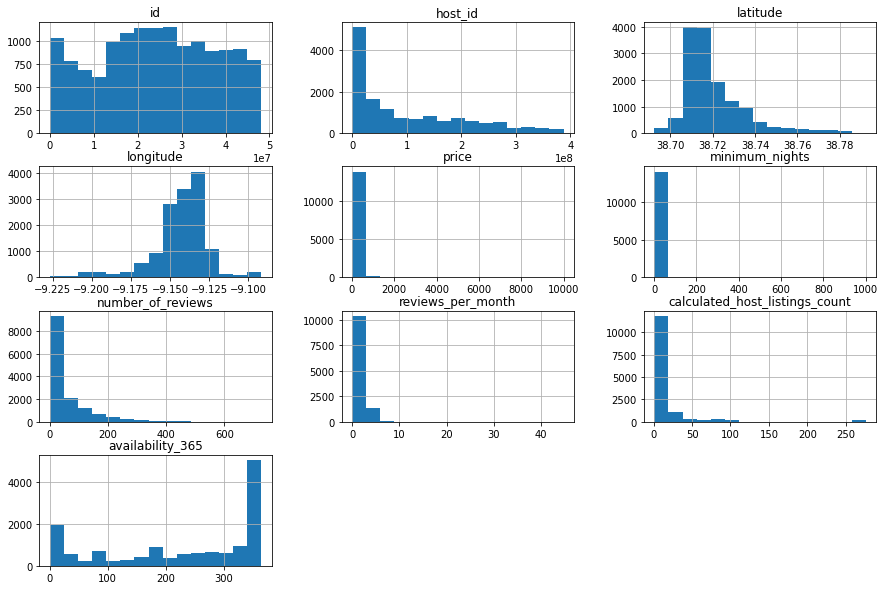

In [ ]:
# plotar o histograma das variáveis numéricas
df_lisboa.hist(bins=15, figsize=(15,10));

### **Q4. Há *Outliers* presentes?**
Pela distribuição do histograma de variáveis podemos verificar indícios de *outliers*. 

Mas primeiramente, o que são outliers?

Outliers são dados que se diferenciam drasticamente de todos os outros, são pontos fora da curva normal, e que provavelmente vai causar anomalias nos resultados obtidos através de algoritmos de análise.

Olhando para as variáveis `price`, `minimum_nights` e `reviews_per_moth`, percebemos que elas apresentam distorções na representação gráfica de classes. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:
* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots`para a variável.

O resumo estatístico nos traz as tendências centrais, a dispersão e a forma da distribuição do conjunto de dados.


In [ ]:
# ver o resumo estatístico das variáveis numéricas
df_lisboa[['price', 'minimum_nights','number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,14100.000000,14100.000000,14100.000000,11812.000000,14100.000000,14100.000000
mean,89.637305,3.732695,52.468014,1.358953,15.446596,231.230851
std,243.854126,14.366564,74.728595,1.328956,38.512807,134.211814
min,8.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.000000,1.000000,2.000000,0.327500,1.000000,106.000000
50%,59.000000,2.000000,20.000000,0.980000,4.000000,270.000000
75%,86.000000,3.000000,74.000000,2.070000,12.000000,361.000000
max,9999.000000,1000.000000,727.000000,44.750000,276.000000,365.000000


Olhando para o resumo estatístico acima, podemos confirmar algumas hipóteses como:
* A variável price possui 75% dos valores abaixo de 86, porém, seu valor máximo é 9999.
* A quantidade minima de noites (`minimum_nights`) possui valores acima de 365 dias.

Já o boxplot é uma ferramenta gráfica que nos permite visualizar a distribuição e os valores discrepantes (outliers) dos dados.

#### Boxplot para minimum_nights


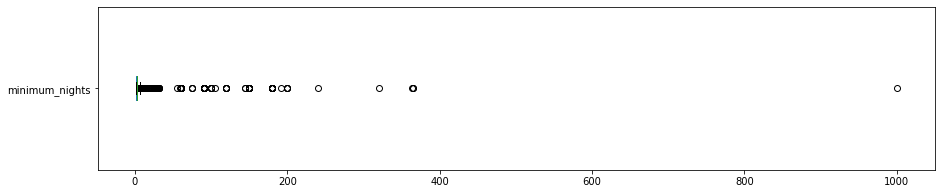

minimum_nights: valores cima de 30:
91 entradas
0.6454%


In [ ]:
# minimum_nights
df_lisboa.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()
# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores cima de 30:")
print("{} entradas".format(len(df_lisboa[df_lisboa.minimum_nights > 30])))
print("{:.4f}%".format((len(df_lisboa[df_lisboa.minimum_nights > 30]) / df_lisboa.shape[0])*100))

#### Boxplot para price

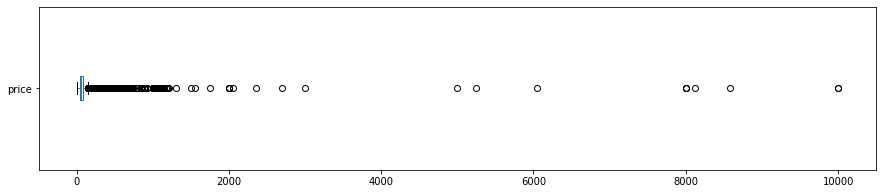

price: valores acima de 500:
204 entradas
1.4468%


In [ ]:
#price
df_lisboa.price.plot(kind='box', vert=False, figsize=(15,3),)
plt.show()
# ver quantidade de valores acima de 500 para price
print('price: valores acima de 500:')
print('{} entradas'.format(len(df_lisboa[df_lisboa.price > 500])))
print('{:.4f}%'.format((len(df_lisboa[df_lisboa.price > 500]) / df_lisboa.shape[0])*100))


Alguns insigths tirados dessa análise:
* Só existem 204 entradas com valores acima de 500
* E essas acomodações representam apenas cerca de 1,5% do *dataset* 

####**Histograma sem *outliers***

Após identificar *outliers* nas variáveis `price` e `minimum_nights` vamos limpar o *DataFrame* delas e plotar um novo histograma.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


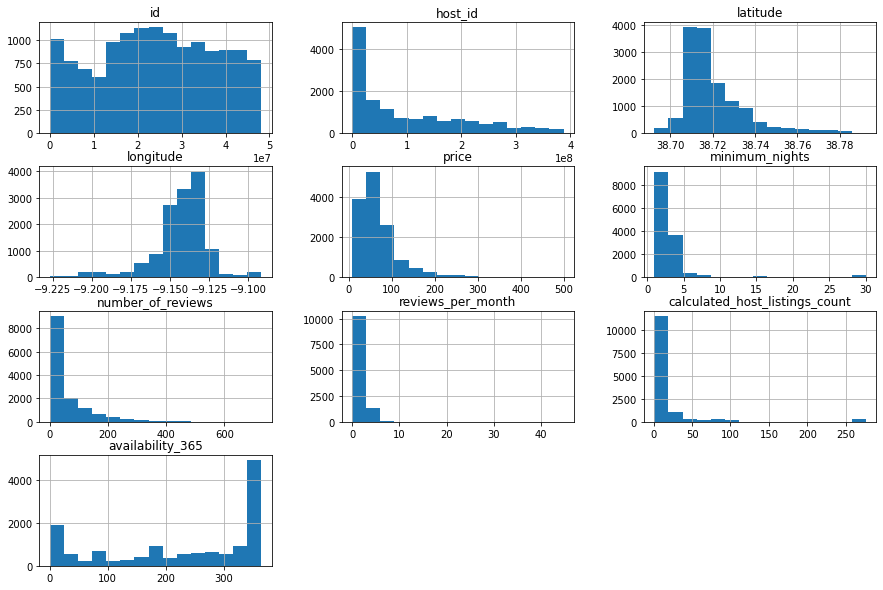

In [ ]:
# remover os *outliers* em um novo DataFrame
df_clean = df_lisboa.copy()
df_clean.drop(df_clean[df_lisboa.price > 500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_lisboa.minimum_nights > 30].index, axis=0, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q5. Qual a média dos preços de aluguel?**

Saber a média de preços por noite dos imóveis disponíveis pode ser uma ótima forma de obter um `insight` para avaliar se o imóvel que se pretense alugar tem um bom preço. Com essa informação podemos avaliar individualmente os imóveis considerando se está com um valor muito acima dos demais disponíveis na mesma região.
* Conseguimos verificar que o valor *médio* do aluguel das acomodações é **`71,62 euros`**.

In [ ]:
# ver a média da coluna `price``
df_clean['price'].mean()

71.62480081124149

### **Q6. Qual a correlação existente entre as variáveis**
Quando falamos em correlação significa que estamos buscando uma relação entre as duas coisas, onde uma está diretamente relacionada a outra em uma situação de causa e efeito.

Essas relações podem ser medidas, e é função do coeficiente de relação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matrix, usando a biblioteca `seaborn`

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.049061,-0.108604,-0.124914,0.006428,0.028565
minimum_nights,-0.049061,1.000000,-0.040181,-0.054522,-0.046428,-0.027298
number_of_reviews,-0.108604,-0.040181,1.000000,0.807456,-0.116059,0.007760
reviews_per_month,-0.124914,-0.054522,0.807456,1.000000,-0.122763,0.003111
calculated_host_listings_count,0.006428,-0.046428,-0.116059,-0.122763,1.000000,0.078129
availability_365,0.028565,-0.027298,0.007760,0.003111,0.078129,1.000000


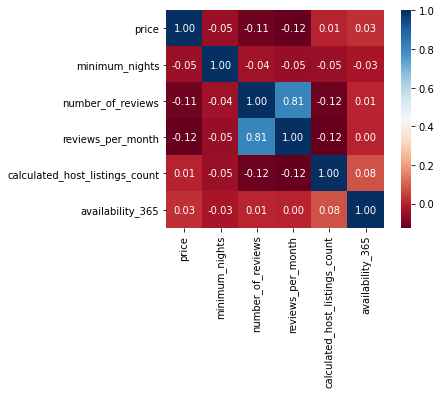

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna room_type indica qual categoria de imóvel está anunciada na plataforma. No site, existem opções de apartamentos/casas inteiras, aluguel de um quarto privado ou até mesmo quarto compartilhado com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    10399
Private room        2896
Hotel room           286
Shared room          225
Name: room_type, dtype: int64

Os tipos de imóveis que mais aparecem são, em ordem:
* Casa/Apt inteiros
* Quartos privados
* Quartos de Hotel
* Quartos compartilhados

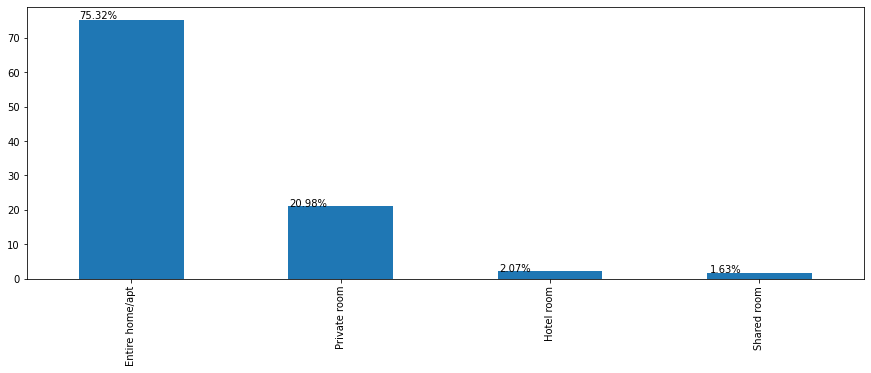

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
ax = (df_clean.room_type.value_counts() / df_clean.shape[0] * 100).plot(kind='bar', figsize=(15,5))
# Adicionando porcentagem no gráfico de barras
for p in ax.patches:
    ax.annotate(str("{:.2f}%".format(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.005))

Os imóveis têm uma distribuição bem interessante, veja:

* `Quartos privados` e `Casas/Apt inteiros` ocupam cerca de 96% dos imóveis anunciados
* Cerca de 2% são `quartos de hotel`
* E 1,6% aproximadamente são `quartos compartilhados`

### **Q6. Qual a localidade mais cara em Lisboa?**

É possível verificar uma variável em função de outra, usando `groupby()`. Neste caso, queremos comparar os bairros (neighbourhoods) a partir do preço do aluguel.


neighbourhood
Parque das Naes           105.325000
So Domingos de Benfica     87.188679
Belm                       85.058182
Lumiar                     82.480392
Santo Antnio               80.317418
Misericrdia                76.330759
Santa Maria Maior          76.090235
Alvalade                   71.405882
Estrela                    68.249694
Campo de Ourique           68.159722
Name: price, dtype: float64


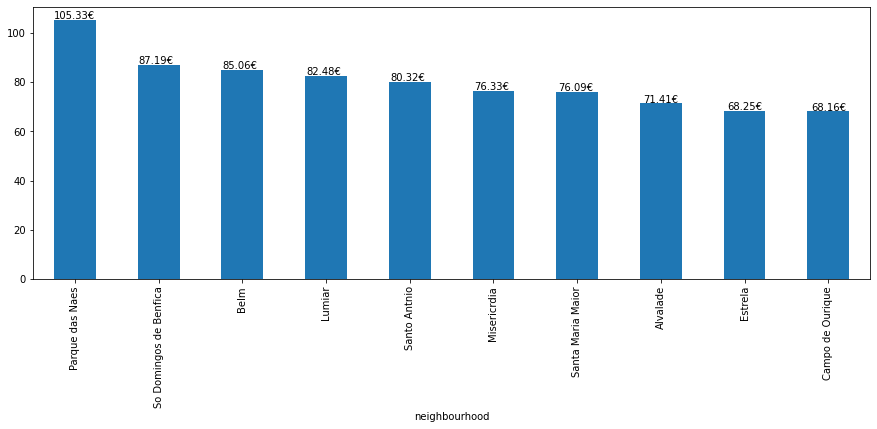

In [ ]:
# ver preços por bairros, na média
print(df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10])
ax = df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10].plot(kind='bar', figsize=(15,5))

for p in ax.patches:
    ax.annotate(str("{:.2f}€".format(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.005))

Acima podemos notar que o bairro de **Parque das Naes** apresenta a maior média de aluguéis do dataset após a limpeza dos dados.

Embora não tenha conhecimento prévio da cidade de Lisboa para ter informações de quais os bairros que poderiam apresentar maior valor no custo de locação, em uma pesquisa rápida encontrei uma publicação do Instituto Nacional de Estatística de Portugal, referente ao terceiro trimestre de 2020. Na pesquisa os bairros destacados com o metro quadrado acima da média da cidade de Lisboa (3.375 euros/m2), foram:
* Santa Maria Maior
* Estrela
* Santo António
* Misericórdia
* Arroios
* Alvalade

Sendo que desses Santa Maria Maior, Santo António e Misericórdia possuem preços acima de 4.500 euros o metro quadrado.

Podemos constatar que apenas Arroios, não está entre os 10 bairros com a maior média de locação do dataset.




Para tentar realizar uma avaliação fidedigna dos preços dos aluguéis vamos criar um novo dataframe com a quantidade de imóveis disponíveis e as médias de aluguel por noite.

In [ ]:
lista_bairros = df_clean['neighbourhood'].unique()
# definindo variáveis para ver a quantidade de imóveis de cada região
lista_quantidade_bairros = []
media_precos = []

for bairro in lista_bairros:
  qtd_imoveis = df_clean[df_clean.neighbourhood == bairro].shape[0]
  media = df_clean[df_clean.neighbourhood == bairro].price.mean()
  lista_quantidade_bairros.append(qtd_imoveis)
  media_precos.append(media)

data = {'bairros': lista_bairros,
        'quantidade_imoveis': lista_quantidade_bairros,
        'media_precos': media_precos
        }

df_medias = pd.DataFrame(data, columns= ['bairros', 'media_precos']).sort_values(by='media_precos', ascending=False)
df_medias

,bairros,media_precos
17,Parque das Naes,105.325000
10,So Domingos de Benfica,87.188679
0,Belm,85.058182
3,Lumiar,82.480392
9,Santo Antnio,80.317418
4,Misericrdia,76.330759
1,Santa Maria Maior,76.090235
14,Alvalade,71.405882
5,Estrela,68.249694
21,Campo de Ourique,68.159722


Vamos plotar um gráfico de barras para tentar entender melhora a relação da quantidade de imóveis disponíveis.

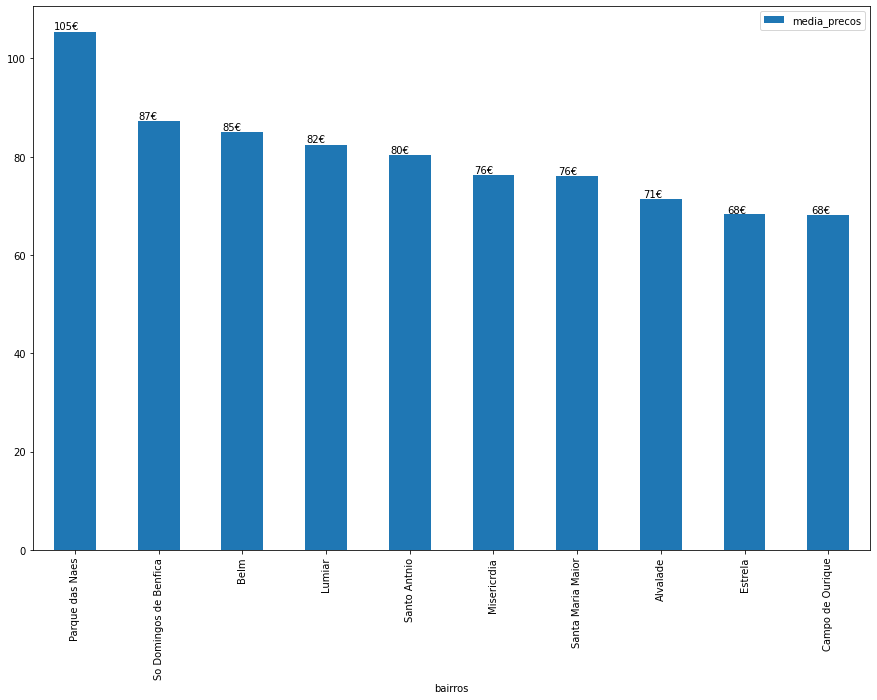

In [ ]:
ax = df_medias[:10].plot('bairros', kind='bar', figsize=(15,10))

# Adicionando porcentagem no gráfico de barras
for p in ax.patches:
    ax.annotate(str("{:.0f}€".format(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.005))

E vamos avaliar a porcentagem de imóveis disponíveis de cada bairro em relação ao total disponível para locação em Lisboa.

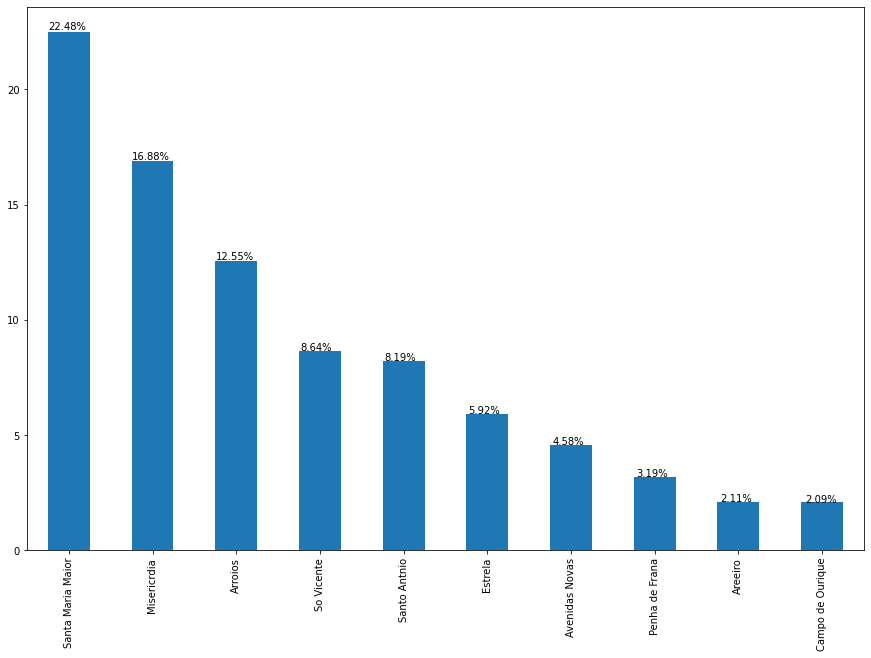

In [ ]:
df_result = df_clean.neighbourhood.value_counts() / df_clean.shape[0] * 100

ax = df_result[:10].plot(kind='bar', figsize=(15,10))

# Adicionando porcentagem no gráfico de barras
for p in ax.patches:
    ax.annotate(str("{:.2f}%".format(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.005))

Com isso conseguimos tirar algumas conclusões:
* Parque das Nações é o bairro onde encontramos os imóveis anunciados com a média mais alta de Lisboa, cerca de 105,32 euros.
* Dos bairros com maior quantidade de imóveis disponíveis para locação a maior média é do bairro Santo Antônio, com 80,31 euros, seguido de Misericórdia com 76,33 e Santa Maria Maior com 76,09.
* Cerca de 51% dos imóveis disponíveis para locação estão concentrados nos bairros de Santa Maria Maior, Misericórdia e Arroios.

A pergunta que podemos fazer é: 

Porquê os três bairros com o metro quadrado mais caro de Lisboa não tem o maior preço de locação da cidade?

Podemos supor que é devido a grande quantidade de imóveis disponíveis para locação nesses bairros, o que acaba favorecendo a livre concorrência e a baixa dos preços nessas regiões em detrimento de outras.

Como são fornecidas as Latitudes e longitudes para os imóveis, é possível plotar cada ponto em um gráfico. Para isso, considera-se `x=longitude` e `y=latitude`.

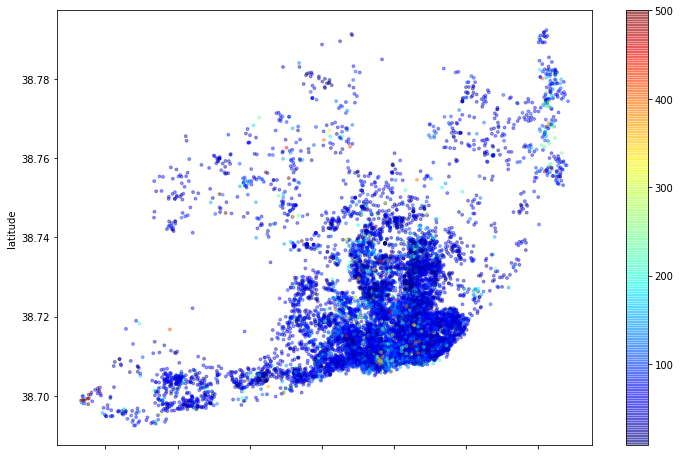

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean=df_clean[df_clean.neighbourhood_group=='Lisboa']
df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

A média do mínimo de noites é 2,9. Isso nos mostra que normalmente os proprietários costumam disponibilizar os imóveis por no mínimo 3 noites nos fins de semana.

In [ ]:
# ver a média da coluna `minimum_nights`
df_clean['minimum_nights'].mean()

2.928219614660293

## Conclusões


Neste projeto realizamos uma análise superficial dos dados do Airbnb da cidade de Lisboa.

Embora Portugal tenha um custo de vida relativamente baixo, o mesmo não acontece com a despesa de moradia. Uma pessoa que recebe um salário mínimo em Portugal, cerca de 665 euros, teria dificuldade para custear uma locação no Airbnb que tem preço médio de 71,62 (apenas para comparação).

Também podemos notar que alguns bairros têm um número menor de imóveis em relação a outros o que pode gerar algumas distorções e equívocos na interpretação dos dados.

Conseguimos obter algumas informações:
* 75% dos imóveis disponíveis para alugar são do tipo `Entire home/apt`
* Parque das Nações é bairro mais caro de Lisboa com média de 105,32 euros.
* Os bairros mais caros e com maior quantidade de locação (acima de 1000 imóveis disponíveis), Santo Antônio com média de 80,31 euros, seguido de Misericórdia com 76,33 euros e Santa Maria Maior com 76,09 euros.
* Santa Clara é o bairro com menor número de imóveis anunciados e com a menor média de preço de locação, 37,37 euros.
* O mínimo de estadias em média que se pode alugar é cerca de 3 noites. 
* Cerca de 51% dos imóveis disponíveis para locação estão concentrados nos bairros de Santa Maria Maior, Misericórdia e Arroios.

Por fim podemos destacar que o dataset é uma versão resumida, ideal para uma abordagem inicial. Para uma análise mais detalhada devemos utilizar um dataset completo, com 106 atributos disponíveis.



